In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Read the data

In [3]:
ufo_df = pd.read_csv ('./ufo_sightings.csv', header=None,low_memory=False)
ufo_df.shape

(80332, 11)

In [4]:
ufo_df.columns = ['datetime_sighted', 'city', 'state', 'country', 'ushape', 'duration_seconds', 'duration_text', 'description_text', 'date_recorded', 'lat', 'long']

In [5]:
ufo_df.head()

,datetime_sighted,city,state,country,ushape,duration_seconds,duration_text,description_text,date_recorded,lat,long
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime_sighted    80332 non-null object
city                80332 non-null object
state               74535 non-null object
country             70662 non-null object
ushape              78400 non-null object
duration_seconds    80332 non-null object
duration_text       80332 non-null object
description_text    80317 non-null object
date_recorded       80332 non-null object
lat                 80332 non-null object
long                80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


## Understanding the problem

**Description of the problem**

We would like to build a model to predict the geographic location: UFO sighting from its other characteristics. But this data set contains 5 variables that represent location: city, state, country, latitude, and longitude. Therefore we need to choose one of them as the target variable, and remove the other 4 variables.  We choose to predict *country*.

Thus our goal is to build a model for predicting *country* from other non-location variables.

**Questions**:  answer the following question based on the information given above.

1. What is the **target** attribute?
2. What are the **predictor** attributes?
3. Is this a **classification** task or a **regression** task? Explain.

<font color='red'> Answers </font>

Q1.  The target attribute is `country`

Q2.  The predictor attributes are all the non-location attributes: 

     date_recorded, datetime_sighted, description_text, duration_seconds, duration_text, ushape

Q3. This is a **classification** task because `country` is a **categorical** attribute.

In [7]:
set(ufo_df.columns) - {'lat','long','city','state','country'}

{'date_recorded',
 'datetime_sighted',
 'description_text',
 'duration_seconds',
 'duration_text',
 'ushape'}

****

## Understanding the data

**Questions**:

1. Based on the descriptions given in the data dictionary, what is the **_true_** data type of each column?
2. In how many countries do these UFO sightings occur? What are those countries?
3. What is the common denominator among these countries?

<font color='red'> Answers </font>

Q1.

    date_recorded:  unstructured
    datetime_sighted: unstructured
    description_text: unstructured
    duration_seconds: numeric continuous
    duration_text: unstructured
    ushape: categorical

Q2.

The UFO sightings occur in 5 different countries: USA (us), Great Britain (gb), Canada (ca), Australia (au), and Germany (de)

Q3.

The common denominator among them is that they are all western/developed and english-speaking countries (except for Germany).

In [8]:
ufo_df.country.nunique()

5

In [9]:
ufo_df.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [10]:
ufo_df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

***

## Data cleaning

### Manual feature selection

Below you will remove attributes that are redundant/duplicate or useless for building the model for predicting *country* from other non-location variables.

Remember that manual feature selection is done **based only** on descriptions of the variables and understanding of the probem. No programming is required.

**Questions**:

1. Create a new data frame called `ufo_df_sub` that is a copy of `ufo_df`; use the `copy` method.

2. Remove all location columns from `ufo_df_sub` except country (i.e. city, state, lat, and long). Use the `drop` method.

3. Which of the remaining variables in `ufo_df_sub` should be removed because they are **redundant** or **duplicate** of another variable? Explain.

4. Which of the remaining variables in `ufo_df_sub` should be removed because they are **useless**: totally unrelated to the target variable?  *Hint*: unstructured variables are *not* useless; they just need to be transformed ...

5. Modify `ufo_df_sub` by removing the columns that you identified in the previous two questions.

In [11]:
# Q1.  THIS IS ALREADY DONE FOR YOU
ufo_df_sub = ufo_df.copy()
ufo_df_sub.shape

(80332, 11)

In [12]:
# read documentation of drop() method
# ?ufo_df.drop

In [13]:
# Q2.  THIS IS ALREADY DONE FOR YOU
ufo_df_sub = ufo_df_sub.drop(columns=['city', 'state', 'lat', 'long'], axis=1)
ufo_df_sub.shape                           

(80332, 7)

<font color='red'> Answers </font>

Q3.  Which of the remaining variables in `ufo_df_sub` should be removed because they are **redundant** or **duplicate** of another variable? Explain.

Q4. Which of the remaining variables in `ufo_df_sub` should be removed because they are **useless**: totally unrelated to the target variable?  *Hint*: unstructured variables are *not* useless; they just need to be transformed ...

The remaining predictor attributes are:

       datetime_sighted: relevant (useful)
       ushape: relevant
       duration_seconds: relevant
       duration_text: redundant
       description_text: relevant
       date_recorded: useless

In [14]:
ufo_df_sub.columns

Index(['datetime_sighted', 'country', 'ushape', 'duration_seconds',
       'duration_text', 'description_text', 'date_recorded'],
      dtype='object')

In [15]:
#Q5.

ufo_df_sub = ufo_df_sub.drop(columns=['date_recorded', 'duration_text'], axis=1)
ufo_df_sub.shape 

(80332, 5)

In [16]:
ufo_df_sub.head()

,datetime_sighted,country,ushape,duration_seconds,description_text
0,10/10/1949 20:30,us,cylinder,2700,This event took place in early fall around 194...
1,10/10/1949 21:00,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...
2,10/10/1955 17:00,gb,circle,20,Green/Orange circular disc over Chester&#44 En...
3,10/10/1956 21:00,us,circle,20,My older brother and twin sister were leaving ...
4,10/10/1960 20:00,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...


### Drop missing data

Let's remove some of the rows where certain columns have missing values. We're going to look at the length_of_time column, the state column, and the type column. If any of the values in these columns are missing, we're going to drop the rows.

**Questions**:  (use data in `ufo_df_sub`)

1. how many values are missing in each column?
2. Remove all rows that contain any missing values by calling the `dropna` method.
3. What is the shape of the new data frame? How many rows were removed?

<font color='red'> Answers </font>

In [17]:
## Q1. how many values are missing in each column?

ufo_df_sub.isnull().sum()

datetime_sighted       0
country             9670
ushape              1932
duration_seconds       0
description_text      15
dtype: int64

In [18]:
# read documentation of dropna method
#?ufo_df_sub.dropna

In [19]:
## Q2. Remove all rows that contain any missing values by calling the `dropna` method.

print(ufo_df_sub.shape)
ufo_df_sub.dropna(how='any', inplace=True)
print(ufo_df_sub.shape)

(80332, 5)
(68993, 5)


In [20]:
## Q3.  What is the shape of the new data frame? How many rows were removed?

print('The shape of the new data frame:')
print(ufo_df_sub.shape)
print()

print('The number of rows that were removed:')
print(80332 - 68993)

The shape of the new data frame:
(68993, 5)
The number of rows that were removed:
11339


***

### Data type conversions

The dtype of all columns is `object`, which means they are encoded as text. Therefore some type conversions are necessary.

**Questions**: (use data in `ufo_df_sub`)

1. Change the type of the numeric variables to float by calling `astype()` method. Put the result in the **same** column in `ufo_df_sub`.
2. For the sake of simplicity, DO NOT modify the type of categorical variables to `cateory`.
3. Change the type of date/time variables using `pd.to_datetime()` function.
4. Verify your results by displaying `ufo_df_sub.dtypes`

<font color='red'> Answers </font>

In [22]:
ufo_df_sub.dtypes

datetime_sighted    object
country             object
ushape              object
duration_seconds    object
description_text    object
dtype: object

In [23]:
## Q1.  Change the type of the numeric variables to float by calling `astype()` method. Put the result in the **same** column in `ufo_df_sub`.

ufo_df_sub['duration_seconds'] = pd.to_numeric(ufo_df_sub.duration_seconds, errors='coerce')

## ANOTHER METHOD:
## ufo_df_sub['duration_seconds'] = ufo_df_sub.duration_seconds.astype(float)

In [24]:
## Q2. For the sake of simplicity, DO NOT modify the type of categorical variables to cateory.

# NOTHING TO DO HERE!


In [25]:
## Q3. Change the type of date/time variables using pd.to_datetime() function.

# THIS QUESTION IS ALREADY ANSWERED FOR YOU BELOW.


In [26]:
# READ DOCUMENTATION OF THIS FUNCTION.
?pd.to_datetime

In [27]:
if "datetime_sighted" in ufo_df_sub.columns:
    ufo_df_sub["datetime_sighted"] = pd.to_datetime(ufo_df_sub.datetime_sighted, errors='coerce')

In [28]:
## Q4. Verify the final results.

ufo_df_sub.dtypes

datetime_sighted    datetime64[ns]
country                     object
ushape                      object
duration_seconds           float64
description_text            object
dtype: object

## Feature engineering

### Feature engineering of numeric columns

In this section, you'll investigate the useful numeric variables in this dataset and determine whether they should be scaled and/or log-normalized.

**Questions**:   (use data in `ufo_df_sub`)

1. Plot the distribution of the duratin_seconds columns using a histogram and/or boxplot.
2. Using `np.log` function perform log normalization on the `duration_seconds` column (because it is very skewed). Put the result in a new column in `ufo_df_sub` called `duration_sec_lg`.
3. Using the `StandardScaler` class perform standard scaling on the `duration_sec_lg` variable. Store the result in a new column in `ufo_df_sub` called `duration_sec_lg_scaled`.
4. Plot the distribution of the new columns. Is its distribution near symmetric?

<font color='red'> Answers </font>

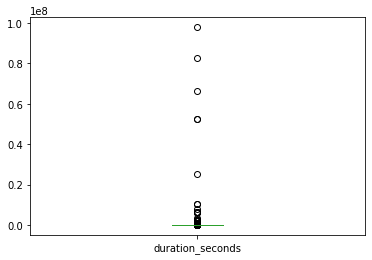

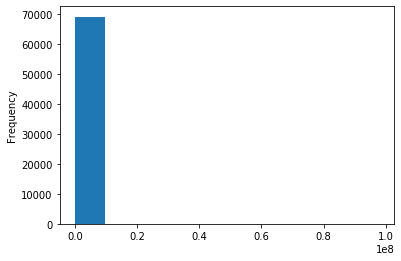

In [29]:
## Q1. Plot the distribution of the duratin_seconds columns using a histogram and/or boxplot.

fig1=ufo_df_sub.duration_seconds.plot.box()
plt.show()
fig2=ufo_df_sub.duration_seconds.plot.hist()

In [30]:
ufo_df_sub.duration_seconds.describe()

count    6.899300e+04
mean     8.220724e+03
std      6.321964e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration_seconds, dtype: float64

In [31]:
## Q2. Using `np.log` function perform log normalization on the `duration_seconds` column (because it is very skewed). Put the result in a new column in `ufo_df_sub` called `duration_sec_lg`.

# log normalization of variables

ufo_df_sub['duration_seconds_lg'] = np.log(ufo_df_sub.duration_seconds)
ufo_df_sub[['duration_seconds','duration_seconds_lg']].head()

,duration_seconds,duration_seconds_lg
0,2700.0,7.901007
2,20.0,2.995732
3,20.0,2.995732
4,900.0,6.802395
5,300.0,5.703782


In [32]:
## Q3. Using the `StandardScaler` class perform standard scaling on the `duration_sec_lg` variable. Store the result in a new column in `ufo_df_sub` called `duration_sec_lg_scaled`.

# Standard scaling of variables (i.e. z-score normalization)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [33]:
ufo_df_sub['duration_seconds_lg_scaled'] = sc.fit_transform(ufo_df_sub[['duration_seconds_lg']]).ravel()
ufo_df_sub[['duration_seconds_lg','duration_seconds_lg_scaled']].head()

,duration_seconds_lg,duration_seconds_lg_scaled
0,7.901007,1.367018
2,2.995732,-0.900799
3,2.995732,-0.900799
4,6.802395,0.859105
5,5.703782,0.351192


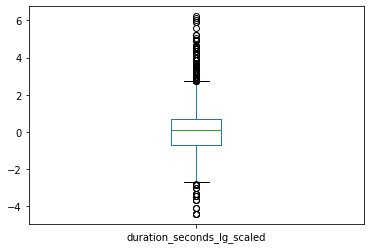

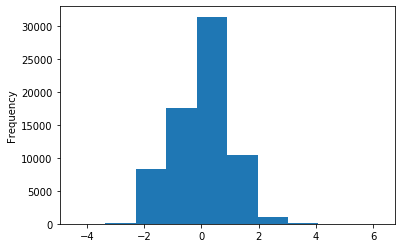

In [34]:
## Q4. Plot the distribution of the new columns. Is its distribution near symmetric?

# Answer: yes, the distribution seems near-symmetric.

fig1=ufo_df_sub.duration_seconds_lg_scaled.plot.box()
plt.show()
fig2=ufo_df_sub.duration_seconds_lg_scaled.plot.hist()

*****

### Feature engineering of categorical columns

**Questions**:   (use data in `ufo_df_sub`)

1. How many categories does the `ushape` column have?
2. Modify the `ushape` column by combining all the sparse categories (those that occur <font color='red'>less than 300 times</font>) into a single category called `RARE`.
3. How many categories does the `ushape` column now contain?
4. Using the `pd.get_dummies` function, apply one-hot encoding on the `ushape` column. Store the result in a new data frame called `ushape_hot`.
5. What is the size of the new data frame? is it correct?

<font color='red'> Answers </font>

<font color='blue'>Q1.</font> How many categories does the `ushape` column have?

The `ushape` variable contains 28 different categories, as shown in the output below.

In [35]:
ufo_df_sub.ushape.nunique()

28

In [36]:
ufo_df_sub.ushape.value_counts()

light        14626
triangle      7037
circle        6716
fireball      5526
unknown       4899
other         4889
sphere        4731
disk          4477
oval          3283
formation     2171
cigar         1795
changing      1710
rectangle     1157
flash         1154
cylinder      1121
diamond       1024
chevron        863
teardrop       662
egg            654
cone           276
cross          208
delta            7
round            2
pyramid          1
hexagon          1
changed          1
flare            1
crescent         1
Name: ushape, dtype: int64

<font color='blue'>Q2.</font>  Modify the `ushape` column by combining all the sparse categories (those that occur less than 300 times) into a single category called RARE.

In [37]:
vc = ufo_df_sub.ushape.value_counts()

In [38]:
vc[vc<50]

delta       7
round       2
pyramid     1
hexagon     1
changed     1
flare       1
crescent    1
Name: ushape, dtype: int64

In [39]:
list(vc[vc<300].index)

['cone',
 'cross',
 'delta',
 'round',
 'pyramid',
 'hexagon',
 'changed',
 'flare',
 'crescent']

In [40]:
ufo_df_sub.loc[ufo_df_sub.ushape.isin(vc[vc<300].index.tolist()),'ushape'] = 'RARE'

<font color='blue'>Q3.</font> How many categories does the `ushape` column now contain?

**Answer**: The `ushape` variable now contains 20 categories, as shown in the output below.

In [41]:
ufo_df_sub.ushape.nunique()

20

In [42]:
ufo_df_sub.ushape.value_counts()

light        14626
triangle      7037
circle        6716
fireball      5526
unknown       4899
other         4889
sphere        4731
disk          4477
oval          3283
formation     2171
cigar         1795
changing      1710
rectangle     1157
flash         1154
cylinder      1121
diamond       1024
chevron        863
teardrop       662
egg            654
RARE           498
Name: ushape, dtype: int64

<font color='blue'>Q4.</font>  Using the `pd.get_dummies` function, apply one-hot encoding on the `ushape` column. Store the result in a new data frame called `ushape_hot`.

In [43]:
ushape_hot_df = pd.get_dummies(ufo_df_sub['ushape'])
type(ushape_hot_df),ushape_hot_df.shape

(pandas.core.frame.DataFrame, (68993, 20))

<font color='blue'>Q5.</font> What is the size of the new data frame? is it correct?

- The size of the new data frame is 68993 rows by 20 columns. 
- Yes this is correct (see boolean expressions below).

In [44]:
ushape_hot_df.shape

(68993, 20)

In [45]:
ushape_hot_df.shape[1] == ufo_df_sub.ushape.nunique()

True

In [46]:
ushape_hot_df.shape[0] == ufo_df_sub.shape[0]

True

### Feature engineering of unstructured columns

#### Time/date columns

**Questions**:   (use data in `ufo_df_sub`)

Answer the following questions ONLY IF you have selected the date attributes as being useful.

1. Create two new variables that contain the month and year of the `datetime_sighted` column.
2. Create two new variables that contain the month and year of the `date_recorded` column.

<font color='red'> Answers </font>

<font color='blue'> Q1. </font>  Create two new variables that contain the month and year of the `datetime_sighted` column.

In [47]:
# Extract the month from the date column
ufo_df_sub["month_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.month)

# Extract the year from the date column
ufo_df_sub["year_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.year)

# Take a look at the new columns to make sure everything is okay
ufo_df_sub[["datetime_sighted", "month_sighted", "year_sighted"]].head()

,datetime_sighted,month_sighted,year_sighted
0,1949-10-10 20:30:00,10.0,1949.0
2,1955-10-10 17:00:00,10.0,1955.0
3,1956-10-10 21:00:00,10.0,1956.0
4,1960-10-10 20:00:00,10.0,1960.0
5,1961-10-10 19:00:00,10.0,1961.0


<font color='blue'> Q2. </font>  Create two new variables that contain the month and year of the `date_recorded` column.

**Answer**: Actually since we have already removed `date_recorded` as a useless variable, we don't need to do anything here!

***

#### Text columns
Let's transform the `description_text` column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

**Questions**:

1. Execute the cells below.
2. How many columns are there in the result matrix?
3. What does the first column in this matrix represent?

<font color='blue'> Q1. </font>  Execute the cells below.

In [48]:
## Let's first take a look at the head of the description field
ufo_df_sub.description_text.head()

0    This event took place in early fall around 194...
2    Green/Orange circular disc over Chester&#44 En...
3    My older brother and twin sister were leaving ...
4    AS a Marine 1st Lt. flying an FJ4B fighter/att...
5    My father is now 89 my brother 52 the girl wit...
Name: description_text, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer class
vec = TfidfVectorizer(max_df=0.8,min_df=10,max_features=50,stop_words='english')

# transform each description to a vector of numeric attributes using the vec object
# we obtain a nxm matrix , where each column corresponds 
desc_tfidf_mat = vec.fit_transform(ufo_df_sub.description_text)

In [50]:
type(desc_tfidf_mat)

scipy.sparse.csr.csr_matrix

In [51]:
desc_tfidf_mat.shape

(68993, 50)

In [52]:
# The vocabulary words corresponding to each column in desc_tfidf  
vec.get_feature_names()

['33',
 '44',
 'ball',
 'blue',
 'bright',
 'craft',
 'east',
 'fast',
 'fireball',
 'flashing',
 'flying',
 'formation',
 'glowing',
 'green',
 'high',
 'hovering',
 'large',
 'light',
 'lights',
 'like',
 'looked',
 'low',
 'moved',
 'moving',
 'night',
 'north',
 'note',
 'nuforc',
 'object',
 'objects',
 'orange',
 'pd',
 'quot',
 'red',
 'saw',
 'seen',
 'shape',
 'shaped',
 'sighting',
 'sky',
 'slowly',
 'sound',
 'south',
 'speed',
 'star',
 'triangle',
 'triangular',
 'ufo',
 'west',
 'white']

<font color='red'> Answers </font>

<font color='blue'> Q2. </font> How many columns are there in the result matrix?

**Answer**: The matrix contains 68993 rows (the same number of rows as `ufo_df_sub`) and 50 columns.

<font color='blue'> Q3. </font> What does the first column in this matrix represent?

**Answer**: The first column represents the first word in the chosen vocabulary, whis is '33'.

****